# Detecção de Emoções em Imagens com Inteligência Artificial

https://www.kaggle.com/c/facial-keypoints-detector


### Redes Neurais Convolucionais

Em redes neurais convolucionais, os dados de entrada são muitas vezes moldados como uma matriz 3D (número de canais, largura da imagem, altura), que preserva a relação espacial entre os pixels. Na figura abaixo, a imagem 3 é um único canal (tons de cinza) de dados, portanto, a dimensão de entrada é especificada como uma tupla (1, largura da imagem, altura da imagem).

![MNIST-flat](https://www.cntk.ai/jup/cntk103a_MNIST_input.png)

Imagens de cor de cena natural são frequentemente apresentadas como canais de cor Vermelho-Verde-Azul (RGB). A dimensão de entrada dessas imagens é especificada como uma tupla (3, largura da imagem, altura da imagem). Se houver dados de entrada RGB como uma varredura volumétrica com largura de volume, altura de volume e profundidade de volume representando os 3 eixos, o formato de dados de entrada será especificado por uma tupla de 4 valores (3, largura de volume, altura de volume, profundidade de volume). Desta forma, podemos especificar as imagens de entrada em espaço arbitrário de dimensão superior.

![input-rgb](https://www.cntk.ai/jup/cntk103d_rgb.png)



CNN é uma rede feedforward composta de diversas camadas de tal forma que a saída de uma camada torna-se a entrada para a próxima camada (semelhante ao MLP). Em MLP, todos os pares possíveis de pixels de entrada são conectados aos nós de saída com cada par tendo um peso, conduzindo assim a uma explosão combinatória de parâmetros a serem aprendidos e também aumentando a possibilidade de overfitting. As camadas de convolução aproveitam a disposição espacial dos pixels e aprendem vários filtros que reduzem significativamente a quantidade de parâmetros na rede. O tamanho do filtro é um parâmetro da camada de convolução.

Nesta seção, apresentamos os fundamentos das operações de convolução. 

### Camada de Convolução

Uma camada de convolução é um conjunto de filtros. Cada filtro é definido por uma matriz de peso (** W **) e bias (𝑏
).

![input-rgb](https://www.cntk.ai/jup/cntk103d_rgb.png)


Estes filtros são varridos através da imagem que realiza o dot product entre os pesos e o valor de entrada correspondente ($\vec{x}^T$). O valor de bias é adicionado à saída do dot product e a soma resultante é opcionalmente mapeada através de uma função de ativação. Esse processo é ilustrado na seguinte animação.


In [1]:
from IPython.display import display, Image
Image(url="https://www.cntk.ai/jup/cntk103d_conv2d_final.gif", width=300)

As camadas de convolução incorporam as seguintes características-chave:

    Em vez de estar totalmente conectado a todos os pares de nós de entrada e saída, cada nó de convolução é ** conectado localmente ** a um subconjunto de nós de entrada localizados em uma região de entrada menor, também chamada de campo receptivo (RF). A figura acima ilustra pequenas regiões 3 x 3 na imagem como a região RF. No caso de uma imagem RGB, haveria três dessas 3 x 3 regiões, uma de cada um dos 3 canais de cor.

    Em vez de ter um único conjunto de pesos (como em uma camada Densa), camadas convolucionais têm vários conjuntos (mostrado na figura com várias cores), chamado ** filtros **. Cada filtro detecta características dentro de cada RF possível na imagem de entrada. A saída da convolução é um conjunto de sub-camadas n (mostradas na animação abaixo) onde n é o número de filtros (consulte a figura acima).

    Dentro de uma subcamada, em vez de cada nó ter seu próprio conjunto de pesos, um único conjunto de ** pesos compartilhados ** são usados por todos os nós nessa subcamada. Isso reduz o número de parâmetros a serem aprendidos. Isso também abre a porta para vários aspectos da aprendizagem profunda que permitiu a construção de soluções muito práticas: -- Manuseio de imagens maiores (digamos 512 x 512) -- Tentando maiores tamanhos de filtro (correspondente a um RF maior) como 11 x 11 -- Aprender mais filtros (digamos 128) -- Explorar arquiteturas mais profundas (mais de 100 camadas) -- Alcançar a invariância de tradução (a capacidade de reconhecer um recurso independentemente de onde eles aparecem na imagem).



#### Strides e Padding

** Como os filtros são posicionados? ** Em geral, os filtros são dispostos em telhas sobrepostas, da esquerda para a direita e de cima para baixo. Cada camada de convolução tem um parâmetro para especificar a filter_shape, especificando a largura e a altura do filtro no caso das imagens de cena mais naturais. Há um parâmetro (strides) que controla a distância até a etapa para a direita ao mover os filtros através de vários RF's em uma linha, e até que ponto para descer quando se move para a próxima linha. O parâmetro booleano pad controla se a entrada deve ser preenchida em torno das bordas para permitir um mosaico completo dos RFs perto das bordas.

A animação acima mostra os resultados com um filter_shape = (3, 3),strides = (2, 2) e pad = False. As duas animações abaixo mostram os resultados quando pad é definido como True. Primeiro, com um passo de 2 e segundo tendo um passo de 1.

Nota: a forma da saída é diferente entre as duas configurações. Muitas vezes a sua decisão de pad e os valores de stride é baseada na forma da camada de saída necessária.


In [2]:
from IPython.display import display, Image

# Plot images com strides de 2 e 1 e padding habilitado
images = [("https://www.cntk.ai/jup/cntk103d_padding_strides.gif" , 'Stride = 2'),
          ("https://www.cntk.ai/jup/cntk103d_same_padding_no_strides.gif", 'Stride = 1')]

for im in images:
    print(im[1])
    display(Image(url=im[0], width=200, height=200))

Stride = 2


Stride = 1


### Pooling Layer

Muitas vezes, é necessário controlar o número de parâmetros, especialmente em redes profundas. Para cada camada de saída da camada de convolução (cada camada, corresponde à saída de um filtro), pode-se ter uma camada de agrupamento (Pooling). As camadas de agrupamento são tipicamente introduzidas para:

    - Reduzir a dimensionalidade da camada anterior (acelerando a rede),
    - Torna o modelo mais tolerante a alterações no local do objeto na imagem. Por exemplo, mesmo quando um dígito é deslocado para um lado da imagem em vez de estar no meio.

É comum inserir periodicamente uma camada de agrupamento entre as camadas Convolucionais sucessivas em uma arquitetura ConvNet. Sua função é reduzir progressivamente o tamanho espacial da representação para reduzir a quantidade de parâmetros e de computação na rede e, portanto, também para controlar o overfitting. A Camada de Agrupamento opera independentemente em cada fatia de profundidade da entrada e redimensiona-a espacialmente, usando a operação MAX. A forma mais comum é uma camada de pooling com filtros de tamanho 2x2 aplicado com um stride de 2 downsamples cada fatia de profundidade na entrada por 2 ao longo de largura e altura, descartando 75% das ativações. Cada operação MAX, neste caso, seria tomar um máximo de 4 números (pequena região 2x2 em alguma fatia de profundidade). A dimensão da profundidade permanece inalterada.

Vale ressaltar que existem apenas duas variações comumente observadas na camada de Max Pooling encontradas na prática: Uma camada de agrupamento com F = 3, S = 2 (também chamada de pool de sobreposição) e mais comumente F = 2, S = 2. Agrupando tamanhos com campos receptivos maiores pode destruir a rede e travar a máquina.

O cálculo em um nó de pooling é muito mais simples do que um nó de feedforward normal. Ele não tem peso, bias ou função de ativação. Ele usa uma função de agregação simples (como max ou average) para calcular sua saída. A função mais comumente usada é "max" - um nó de pooling máximo simplesmente fornece o máximo dos valores de entrada correspondentes à posição do filtro da entrada. A figura abaixo mostra os valores de entrada em uma região 4 x 4. A tamanho máximo da janela de agrupamento é 2 x 2 e começa a partir do canto superior esquerdo. O valor máximo dentro da janela torna-se a saída da região. Cada vez que o modelo é deslocado pela quantidade especificada pelo parâmetro stride (como mostrado na figura abaixo) e a operação de pooling máximo é repetida. 


![maxppool](https://cntk.ai/jup/201/MaxPooling.png)

### Rede Convolucional Típica

![mnist-conv-mp](http://www.cntk.ai/jup/conv103d_mnist-conv-mp.png)

Uma CNN típica contém um conjunto de camadas alternadas de convolução e agrupamento (Pooling) seguido por uma camada de saída densa para a classificação. Você encontrará variantes desta estrutura em muitas redes profundas clássicas (VGG, AlexNet, etc.). Isto está em contraste com a rede MLP, que consiste em 2 camadas densas seguidas por uma camada de saída densa.

As ilustrações são apresentadas no contexto de imagens bidimensionais (2D), mas o conceito e os componentes podem operar em qualquer dado dimensional. O esquema acima mostra 2 camadas de convolução e 2 camadas de agrupamento máximo. Uma estratégia típica é aumentar o número de filtros nas camadas mais profundas, reduzindo o tamanho espacial de cada camada intermediária. Camadas intermediárias.

A figura a seguir ilustra o modelo que vamos construir. Observe que os parâmetros no modelo abaixo devem ser experimentados. Estes são frequentemente chamados de hiperparâmetros de rede. Aumentar a forma do filtro leva a um aumento no número de parâmetros do modelo, aumenta o tempo de computação e ajuda o modelo a se ajustar melhor aos dados. No entanto, corre-se o risco de overfitting. Normalmente, o número de filtros nas camadas mais profundas é maior do que o número de filtros nas camadas anteriores. Escolhemos 8 e 16 como número de filtros para a primeira e segunda camadas, respectivamente. Estes hiperparâmetros devem ser experimentados durante a construção do modelo.

![conv-only](https://www.cntk.ai/jup/cntk103d_convonly2.png)

** Compreendendo os parâmetros **:

Nosso modelo tem duas camadas de convolução, cada uma com peso e bias. Isso adiciona até 4 tensores de parâmetro. Adicionalmente, a camada densa tem tensores de peso e de bias. Assim, os tensores de 6 parâmetros.

Vamos agora contar o número de parâmetros:

        Primeira camada de convolução *: Existem 8 filtros cada um de tamanho (1 x 5 x 5) onde 1 é o número de canais na imagem de entrada. Isto adiciona até 200 valores na matriz de peso e 8 valores de bias.

        Segunda camada de convolução *: Existem 16 filtros cada um de tamanho (8 x 5 x 5) onde 8 é o número de canais na entrada para a segunda camada (= saída da primeira camada). Isto adiciona até 3200 valores na matriz de peso e 16 valores de bias.

        Última camada densa *: Existem 16 x 7 x 7 valores de entrada e produz 10 valores de saída correspondentes aos 10 dígitos no conjunto de dados MNIST. Isto corresponde a (16 x 7 x 7) x 10 valores de peso e 10 valores de bias.

Adicionando estes acima dá os 11274 parâmetros no modelo.


## Construindo e Treinando o Modelo

### Definindo os Dados e Hyperparâmetros

In [3]:
import os
import sys
import inspect
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from modulos import utils
from datetime import datetime
from tensorflow.python.framework import ops
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import warnings

/home/aline/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/aline/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/aline/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/aline/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

In [4]:
# Versão do TensorFlow
# Para instalar a mesma versão do TF, use: 
# CPU: pip install tensorflow==1.8 (no prompt ou terminal)
# GPU: pip install tensorflow_gpu==1.8 (no prompt ou terminal)
tf.__version__

'1.14.0'

In [5]:
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
ops.reset_default_graph()
np.random.seed(123456789)

In [6]:
FLAGS = tf.flags.FLAGS
tf.flags.DEFINE_string("data_dir", "dataset/", "Caminho para o diretório com dados de treino e de teste")
tf.flags.DEFINE_string("logs_dir", "modelo/", "Caminho para o diretório onde o modelo será gravado")
tf.flags.DEFINE_string("mode", "train", "mode: train (Default)/ test")

In [7]:
# Hyperparâmetros
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
MAX_ITERATIONS = 1000
REGULARIZATION = 1e-3
IMAGE_SIZE = 48
NUM_LABELS = 7
VALIDATION_PERCENT = 0.1

## Funções Auxiliares Para Construção do Modelo

In [8]:
def add_to_regularization_loss(W, b):
    tf.add_to_collection("losses", tf.nn.l2_loss(W))
    tf.add_to_collection("losses", tf.nn.l2_loss(b))

In [13]:
def weight_variable(shape, stddev=0.02, name=None):
    initial = tf.truncated_normal(shape, stddev=stddev)
    if name is None:
        return tf.Variable(initial)
    else:
        return tf.get_variable(name, initializer=initial)

In [10]:
def bias_variable(shape, name=None):
    initial = tf.constant(0.0, shape=shape)
    if name is None:
        return tf.Variable(initial)
    else:
        return tf.get_variable(name, initializer=initial)

## Construção do Modelo

In [11]:
def emotionCNN(dataset):
    
    # Camada de Convolução 1
    with tf.name_scope("conv1") as scope:
        tf.summary.histogram("W_conv1", weights['wc1'])
        tf.summary.histogram("b_conv1", biases['bc1'])
        conv_1 = tf.nn.conv2d(dataset, weights['wc1'], strides=[1, 1, 1, 1], padding='SAME')
        h_conv1 = tf.nn.bias_add(conv_1, biases['bc1'])
        h_1 = tf.nn.relu(h_conv1)
        h_pool1 = tf.nn.max_pool(h_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        add_to_regularization_loss(weights['wc1'], biases['bc1'])
        
    # Camada de Convolução 2
    with tf.name_scope("conv2") as scope:
        tf.summary.histogram("W_conv2", weights['wc2'])
        tf.summary.histogram("b_conv2", biases['bc2'])
        conv_2 = tf.nn.conv2d(h_pool1, weights['wc2'], strides=[1, 1, 1, 1], padding='SAME')
        h_conv2 = tf.nn.bias_add(conv_2, biases['bc2'])
        h_2 = tf.nn.relu(h_conv2)
        h_pool2 = tf.nn.max_pool(h_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        add_to_regularization_loss(weights['wc2'], biases['bc2'])
        
    # Camada Totalmente Conectada 1
    with tf.name_scope("fc_1") as scope:
        prob = 0.5
        image_size = IMAGE_SIZE // 4
        h_flat = tf.reshape(h_pool2, [-1, image_size * image_size * 64])
        tf.summary.histogram("W_fc1", weights['wf1'])
        tf.summary.histogram("b_fc1", biases['bf1'])
        h_fc1 = tf.nn.relu(tf.matmul(h_flat, weights['wf1']) + biases['bf1'])
        h_fc1_dropout = tf.nn.dropout(h_fc1, prob)
        
    # Camada Totalmente Conectada 2
    with tf.name_scope("fc_2") as scope:
        tf.summary.histogram("W_fc2", weights['wf2'])
        tf.summary.histogram("b_fc2", biases['bf2'])
        pred = tf.matmul(h_fc1_dropout, weights['wf2']) + biases['bf2']
    
    return pred

In [14]:
# Pesos e Bias do Modelo
weights = {
    'wc1': weight_variable([5, 5, 1, 32], name="W_conv1"),
    'wc2': weight_variable([3, 3, 32, 64],name="W_conv2"),
    'wf1': weight_variable([int((IMAGE_SIZE // 4) * (IMAGE_SIZE // 4)) * 64, 256],name="W_fc1"),
    'wf2': weight_variable([256, NUM_LABELS], name="W_fc2")
}

biases = {
    'bc1': bias_variable([32], name="b_conv1"),
    'bc2': bias_variable([64], name="b_conv2"),
    'bf1': bias_variable([256], name="b_fc1"),
    'bf2': bias_variable([NUM_LABELS], name="b_fc2")
}

In [15]:
def loss(pred, label):
    cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=label))
    tf.summary.scalar('Entropy', cross_entropy_loss)
    reg_losses = tf.add_n(tf.get_collection('losses'))
    tf.summary.scalar('Reg_loss', reg_losses)
    return cross_entropy_loss + REGULARIZATION * reg_losses

In [16]:
def train(loss, step):
    return tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss, global_step=step)

In [17]:
def get_next_batch(images, labels, step):
    offset = (step * BATCH_SIZE) % (images.shape[0] - BATCH_SIZE)
    batch_images = images[offset: offset + BATCH_SIZE]
    batch_labels = labels[offset: offset + BATCH_SIZE]
    return batch_images, batch_labels

In [18]:
# Listas para resultados de treinamento
train_error_list = []
train_step_list = []

# Listas para resultados de validação
valid_error_list = []
valid_step_list = []

## Treinamento

In [19]:
def main(argv=None):
    
    # Carrega os dados
    train_images, train_labels, valid_images, valid_labels, test_images = utils.read_data(FLAGS.data_dir)
    
    print("\nTamanho do Dataset de Treino: %s" % train_images.shape[0])
    print('Tamanho do Dataset de Validação: %s' % valid_images.shape[0])
    print("Tamanho do Dataset de Teste: %s" % test_images.shape[0])
    
    global_step = tf.Variable(0, trainable=False)
    dropout_prob = tf.placeholder(tf.float32)
    input_dataset = tf.placeholder(tf.float32, [None, IMAGE_SIZE, IMAGE_SIZE, 1], name="input")
    input_labels = tf.placeholder(tf.float32, [None, NUM_LABELS])
    
    pred = emotionCNN(input_dataset)
    output_pred = tf.nn.softmax(pred, name="output")
    loss_val = loss(pred, input_labels)
    train_op = train(loss_val, global_step)
    
    summary_op = tf.summary.merge_all()
    init_op = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init_op)
        summary_writer = tf.summary.FileWriter(FLAGS.logs_dir, sess.graph)
        saver = tf.train.Saver()
        ckpt = tf.train.get_checkpoint_state(FLAGS.logs_dir)
        if ckpt and ckpt.model_checkpoint_path:
            saver.restore(sess, ckpt.model_checkpoint_path)
            print("Modelo Restaurado!")
        
        for step in range(MAX_ITERATIONS):
            batch_image, batch_label = get_next_batch(train_images, train_labels, step)
            feed_dict = {input_dataset: batch_image, input_labels: batch_label}

            sess.run(train_op, feed_dict=feed_dict)
            if step % 10 == 0:
                train_loss, summary_str = sess.run([loss_val, summary_op], feed_dict=feed_dict)
                summary_writer.add_summary(summary_str, global_step=step)
                train_error_list.append(train_loss)
                train_step_list.append(step)
                print("Taxa de Erro no Treinamento: %f" % train_loss)
            
            if step % 100 == 0:
                valid_loss = sess.run(loss_val, feed_dict={input_dataset: valid_images, input_labels: valid_labels})
                valid_error_list.append(valid_loss)
                valid_step_list.append(step)
                print("%s Taxa de Erro na Validação: %f" % (datetime.now(), valid_loss))
                saver.save(sess, FLAGS.logs_dir + 'model.ckpt', global_step=step)
                        
        # Plot do erro durante o treinamento
        plt.plot(train_step_list, train_error_list, 'r--', label='Erro no Treinamento Por Iteração', linewidth=4)
        plt.title('Erro no Treinamento Por Iteração')
        plt.xlabel('Iteração')
        plt.ylabel('Erro no Treinamento')
        plt.legend(loc='upper right')
        plt.show()

        # Plot do erro durante a validação
        plt.plot(valid_step_list, valid_error_list, 'r--', label='Erro na Validação Por Iteração', linewidth=4)
        plt.title('Erro na Validação Por Iteração')
        plt.xlabel('Iteração')
        plt.ylabel('Erro na Validação')
        plt.legend(loc='upper right')
        plt.show()  

print(train_error_list) 
print(valid_error_list) 

[]
[]


Lendo train.csv ...
(4178, 48, 48, 1)
(4178, 7)
Lendo test.csv ...

Salvando ...

Tamanho do Dataset de Treino: 3761
Tamanho do Dataset de Validação: 417
Tamanho do Dataset de Teste: 1312
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0116 14:43:53.967373 139685420353344 deprecation.py:506] From <ipython-input-11-7549f5990121>:31: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



W0116 14:43:53.990977 139685420353344 deprecation.py:323] From <ipython-input-15-5b5ad6141ec8>:2: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Instructions for updating:
Use standard file APIs to check for files with this prefix.


W0116 14:43:54.481084 139685420353344 deprecation.py:323] From /home/aline/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from modelo/model.ckpt-900


I0116 14:43:54.491203 139685420353344 saver.py:1280] Restoring parameters from modelo/model.ckpt-900


Modelo Restaurado!
Taxa de Erro no Treinamento: 0.465368
2020-01-16 14:43:55.788080 Taxa de Erro na Validação: 0.587770
Taxa de Erro no Treinamento: 0.238259
Taxa de Erro no Treinamento: 0.319262
Taxa de Erro no Treinamento: 0.294523
Taxa de Erro no Treinamento: 0.250459
Taxa de Erro no Treinamento: 0.287526
Taxa de Erro no Treinamento: 0.260662
Taxa de Erro no Treinamento: 0.224587
Taxa de Erro no Treinamento: 0.282832
Taxa de Erro no Treinamento: 0.351112
Taxa de Erro no Treinamento: 0.231052
2020-01-16 14:44:20.895089 Taxa de Erro na Validação: 0.652897
Taxa de Erro no Treinamento: 0.278525
Taxa de Erro no Treinamento: 0.253036
Taxa de Erro no Treinamento: 0.285570
Taxa de Erro no Treinamento: 0.278047
Taxa de Erro no Treinamento: 0.241067
Taxa de Erro no Treinamento: 0.237204
Taxa de Erro no Treinamento: 0.332819
Taxa de Erro no Treinamento: 0.242445
Taxa de Erro no Treinamento: 0.275452
Taxa de Erro no Treinamento: 0.328945
2020-01-16 14:44:47.225020 Taxa de Erro na Validação: 0.6

W0116 14:46:07.987988 139685420353344 deprecation.py:323] From /home/aline/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


Taxa de Erro no Treinamento: 0.191324
Taxa de Erro no Treinamento: 0.225243
Taxa de Erro no Treinamento: 0.241175
Taxa de Erro no Treinamento: 0.175386
Taxa de Erro no Treinamento: 0.190057
Taxa de Erro no Treinamento: 0.169747
Taxa de Erro no Treinamento: 0.165366
Taxa de Erro no Treinamento: 0.173699
Taxa de Erro no Treinamento: 0.135259
Taxa de Erro no Treinamento: 0.215708
2020-01-16 14:46:34.249959 Taxa de Erro na Validação: 0.638303
Taxa de Erro no Treinamento: 0.133163
Taxa de Erro no Treinamento: 0.170112
Taxa de Erro no Treinamento: 0.135768
Taxa de Erro no Treinamento: 0.144930
Taxa de Erro no Treinamento: 0.148394
Taxa de Erro no Treinamento: 0.195450
Taxa de Erro no Treinamento: 0.212804
Taxa de Erro no Treinamento: 0.171189
Taxa de Erro no Treinamento: 0.146607
Taxa de Erro no Treinamento: 0.122809
2020-01-16 14:47:00.329268 Taxa de Erro na Validação: 0.583782
Taxa de Erro no Treinamento: 0.228670
Taxa de Erro no Treinamento: 0.142654
Taxa de Erro no Treinamento: 0.184331


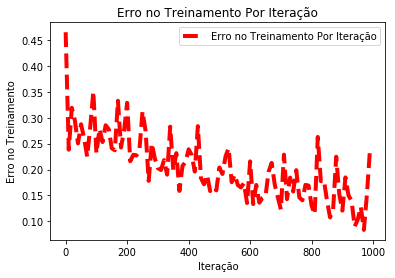

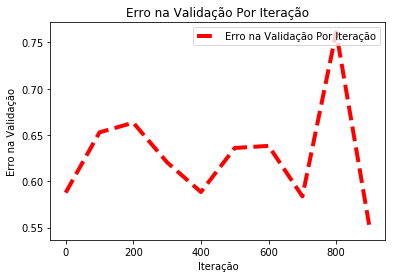

SystemExit: 

In [20]:
if __name__ == "__main__":
    tf.app.run()
    print("Treinanento concluído")